In [26]:
import numpy as np
import mylibrary.nnlib as nn

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

### OR Gate

(200, 1) (200, 1)


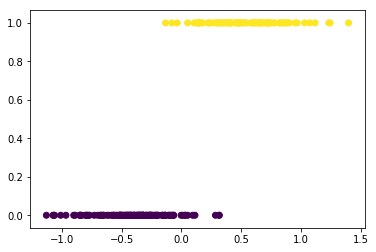

In [97]:
xxx = np.array([[-0.5],[0.5]])
yyy = np.array([[0],[1]])

x = []
y = []
n_data = 200
for i in range(n_data):
    index = np.random.randint(low=0, high=2)
    xx = xxx[index] + np.random.normal(loc=0., scale=0.3, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
x = x - x.mean()
print(x.shape, y.shape)
xx = x.reshape(-1)
yy = y.reshape(-1)
plt.scatter(xx, yy , c=yy)

In [98]:
colors = ['r', 'y', 'g', 'b']

In [99]:
xxx = np.linspace(np.min(xx), np.max(xx), 200).reshape(-1,1)

## Classical gradient descent method of logistic regression

In [100]:
optimizer = nn.Adam(learning_rate=0.1)
log1 = nn.NonLinearLayer(1 ,1, activation=nn.Sigmoid(), optimizer=optimizer)
log1.weights[0][0] = -10.0

_______________________
epoch 0
Loss 4.793549859319233


_______________________
epoch 10
Loss 4.251963670975082


_______________________
epoch 20
Loss 3.774318059875643


_______________________
epoch 30
Loss 3.4395580859158104


_______________________
epoch 40
Loss 3.308554645271356


_______________________
epoch 50
Loss 3.2993917915054323


_______________________
epoch 60
Loss 3.311204860771594


_______________________
epoch 70
Loss 3.3142790640824114


_______________________
epoch 80
Loss 3.310730614115307


_______________________
epoch 90
Loss 3.3040716947884596


_______________________
epoch 100
Loss 3.295928465894792


_______________________
epoch 110
Loss 3.2869181120567332


_______________________
epoch 120
Loss 3.277252981429834


_______________________
epoch 130
Loss 3.266995566420569


_______________________
epoch 140
Loss 3.256153693546512


_______________________
epoch 150
Loss 3.2447141263568846


_______________________
epoch 160
Loss 3.232653937197065


__



_______________________
epoch 1370
Loss 0.12972072299843224


_______________________
epoch 1380
Loss 0.12972036580187282


_______________________
epoch 1390
Loss 0.12972047050020863


_______________________
epoch 1400
Loss 0.12972101839048922


_______________________
epoch 1410
Loss 0.12972199149085972


_______________________
epoch 1420
Loss 0.12972337250791796


_______________________
epoch 1430
Loss 0.12972514480581893


_______________________
epoch 1440
Loss 0.12972729237701786


_______________________
epoch 1450
Loss 0.12972979981455193


_______________________
epoch 1460
Loss 0.1297326522857668


_______________________
epoch 1470
Loss 0.12973583550740103


_______________________
epoch 1480
Loss 0.12973933572194737


_______________________
epoch 1490
Loss 0.12974313967521553


_______________________
epoch 1500
Loss 0.12974723459502535


_______________________
epoch 1510
Loss 0.12975160817096526


_______________________
epoch 1520
Loss 0.1297562485351543


________

TclError: this isn't a Tk application

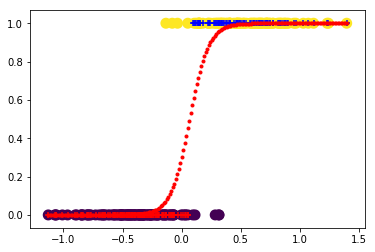

In [101]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = log1.forward(x)
    loss = nn.CrossEntropyBinary.loss(a1, y)
    dy = nn.CrossEntropyBinary.del_loss(a1, y)
    
    dx = log1.backward(dy)
    log1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        out = (a1>0.5).astype(int)

        ax.clear()
        plt.scatter(xx, yy , c=yy, lw=5)
        plt.scatter(xx, out.reshape(-1), c=out.reshape(-1),
                    marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        plt.scatter(xxx.reshape(-1), log1.forward(xxx), c='r', marker='.')
        
        

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

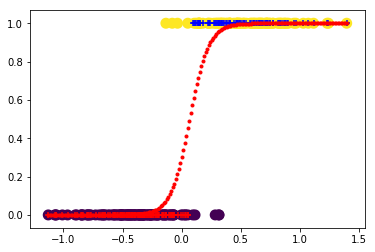

In [102]:
%matplotlib inline
plt.scatter(xx, yy , c=yy, lw=5)
plt.scatter(xx, out.reshape(-1), c=out.reshape(-1),
            marker='+', cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(xxx.reshape(-1), log1.forward(xxx), c='r', marker='.')

In [217]:
log1.weights, log1.bias

(array([[12.58113424]]), array([-0.83901647]))

## Analytical solution to logistic regression

In [143]:
optimizer = nn.SGD(learning_rate=1)
log2 = nn.NonLinearLayer_(1 ,1, activation=nn.Sigmoid(), optimizer=optimizer)
log2.weights[0][0] = -3.5
log2.bias[0] = 0.5

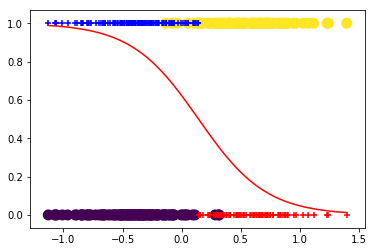

In [240]:
%matplotlib inline
a2 = log2.forward(x)
out = (a2>0.5).astype(int)
plt.scatter(xx, yy , c=yy, lw=5)
plt.scatter(xx, out.reshape(-1), c=out.reshape(-1),
            marker='+', cmap=matplotlib.colors.ListedColormap(colors))
curv = log2.forward(xxx)
plt.plot(xxx.reshape(-1), curv, c='r')

In [145]:
a2 = log2.forward(x)
loss = nn.CrossEntropyBinary.loss(a2, y)
dy = nn.CrossEntropyBinary.del_loss(a2, y)
dx = log2.backward(dy)
# log2.update()

In [146]:
log1.weights, log2.weights, loss

(array([[12.58113424]]), array([[-3.5]]), 1.9421307824778222)

In [147]:
log2.zee

array([[ 0.97077988],
       [-2.34423577],
       [-1.65462455],
       [ 0.62311359],
       [ 0.98248517],
       [-1.9892989 ],
       [ 4.232322  ],
       [-1.34528258],
       [-1.14265425],
       [-0.45443109],
       [ 1.63985006],
       [-1.30101406],
       [-2.6613735 ],
       [ 0.10466224],
       [ 1.62572694],
       [-1.84953443],
       [ 1.90550543],
       [-3.25001355],
       [-0.49391598],
       [ 2.88182075],
       [-1.74112344],
       [ 3.26916209],
       [ 3.41196914],
       [-1.8682565 ],
       [ 0.46226373],
       [-0.58937624],
       [ 1.34959857],
       [-1.14602423],
       [ 1.62371948],
       [-0.35326077],
       [ 2.83944723],
       [ 4.03126211],
       [ 2.94534783],
       [ 1.77370546],
       [-0.54153169],
       [ 1.90994538],
       [ 2.77877963],
       [-0.0102565 ],
       [ 2.06111788],
       [-1.03716177],
       [ 3.45269507],
       [ 2.19356606],
       [ 0.0699803 ],
       [-1.59971273],
       [ 1.59613594],
       [-1

In [148]:
log2.del_output

array([[ 0.72527492],
       [-0.91247496],
       [-0.83951509],
       [-0.34907364],
       [ 0.72760105],
       [-0.87966895],
       [ 0.98568914],
       [-0.79335732],
       [-0.75816663],
       [-0.61169225],
       [ 0.83751453],
       [-0.7860056 ],
       [-0.93470854],
       [ 0.5261417 ],
       [ 0.83558343],
       [-0.86407243],
       [ 0.87051336],
       [-0.9626736 ],
       [ 0.3789715 ],
       [ 0.94694042],
       [-0.85082971],
       [ 0.9633556 ],
       [ 0.96807651],
       [-0.86625641],
       [ 0.61355106],
       [-0.64322201],
       [ 0.79406399],
       [-0.75878398],
       [ 0.83530745],
       [-0.58740808],
       [ 0.94477063],
       [ 0.98255772],
       [ 0.95004315],
       [ 0.85491788],
       [-0.63216866],
       [ 0.87101301],
       [ 0.94151829],
       [-0.5025641 ],
       [ 0.88706621],
       [-0.738302  ],
       [ 0.96931141],
       [ 0.89967025],
       [-0.48251206],
       [-0.83197823],
       [ 0.83147764],
       [-0

In [149]:
log2.del_zee

array([[ 0.14451191],
       [-0.07287427],
       [-0.11310745],
       [-0.07931694],
       [ 0.1442089 ],
       [-0.09311427],
       [ 0.01390419],
       [-0.13006418],
       [-0.13900985],
       [-0.1452921 ],
       [ 0.11397228],
       [-0.13220677],
       [-0.05704385],
       [ 0.13117587],
       [ 0.11479559],
       [-0.1014864 ],
       [ 0.09812413],
       [-0.03459189],
       [ 0.08919174],
       [ 0.04757832],
       [-0.10798604],
       [ 0.03400798],
       [ 0.0299178 ],
       [-0.10036121],
       [ 0.14547673],
       [-0.14761138],
       [ 0.1298504 ],
       [-0.13888088],
       [ 0.11491234],
       [-0.14236412],
       [ 0.04929727],
       [ 0.01683912],
       [ 0.04509015],
       [ 0.10603829],
       [-0.14699909],
       [ 0.09785774],
       [ 0.05184151],
       [-0.12563772],
       [ 0.08886607],
       [-0.14264892],
       [ 0.02883391],
       [ 0.08120756],
       [-0.12048045],
       [-0.11630261],
       [ 0.11650879],
       [-0

In [150]:
log2.del_weights

array([[-0.03728444]])

1.8672018564577753 1.9421307824778222


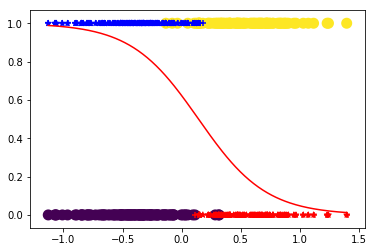

[[ 0.69556523]
 [-0.90647727]
 [-0.82368516]
 [-0.33127357]
 [ 0.69810206]
 [-0.86945909]
 [ 0.98549167]
 [-0.77122098]
 [-0.73177451]
 [-0.57667508]
 [ 0.82140238]
 [-0.76292936]
 [-0.93113971]
 [ 0.49337198]
 [ 0.81919919]
 [-0.85170643]
 [ 0.85904508]
 [-0.96141052]
 [ 0.35821782]
 [ 0.94449841]
 [-0.83659898]
 [ 0.96213597]
 [ 0.96713886]
 [-0.85419573]
 [ 0.57854102]
 [-0.60867948]
 [ 0.77201923]
 [-0.73246073]
 [ 0.81888436]
 [-0.55252961]
 [ 0.94214122]
 [ 0.98226678]
 [ 0.94785917]
 [ 0.84126455]
 [-0.59737335]
 [ 0.85961399]
 [ 0.93859761]
 [-0.47118665]
 [ 0.87785277]
 [-0.70982059]
 [ 0.96844199]
 [ 0.89209857]
 [-0.45252823]
 [-0.81508711]
 [ 0.81451626]
 [-0.84683066]
 [ 0.87706054]
 [ 0.92310588]
 [ 0.64692163]
 [ 0.96365485]
 [ 0.83596508]
 [-0.72242561]
 [ 0.95299056]
 [ 0.78491169]
 [ 0.65720938]
 [ 0.86917969]
 [-0.68927701]
 [ 0.71654657]
 [ 0.93855947]
 [ 0.88180471]
 [-0.4742814 ]
 [ 0.74583253]
 [-0.95529654]
 [-0.89401589]
 [-0.67790461]
 [ 0.64126226]
 [ 0.83210

In [235]:
# changing z according to del_z
sigmoid = nn.Sigmoid()
a2_ = sigmoid.forward(log2.zee - log2.del_zee)
print(nn.CrossEntropyBinary.loss(a2_, y), loss)

out_ = (a2_>0.5).astype(int)
plt.scatter(xx, yy , c=yy, lw=5)
plt.scatter(xx, out_.reshape(-1), c=out_.reshape(-1),
            marker='+', cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(xx, out.reshape(-1), c=out.reshape(-1),
            marker='*', cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(xxx.reshape(-1), curv, c='r')
plt.show()

print(nn.CrossEntropyBinary.del_loss(a2_, y))

In [211]:
# changing once doesnt find the true magnitude  of the gradient of zee
# recursively finding gradient to fit the data
dz_ = np.copy(log2.del_zee)
z_ = np.copy(log2.zee)

for i in range(50):
    a2_ = sigmoid.forward(z_)
    dy_ = nn.CrossEntropyLoss.del_loss(a2_, y)
    dz_ = sigmoid.backward(dy_)
    z_ = z_ - dz_

In [212]:
print(nn.CrossEntropyBinary.loss(a2_, y), loss)

0.29872252640355007 1.9421307824778222


In [213]:
x.mean()

4.440892098500626e-18

In [214]:
br = z_.mean()
wr = x.T.dot(z_ - br)/(x**2).sum()
wr, br

(array([[1.6404328]]), -0.08971327146885763)

In [215]:
zout_ = x@wr + br
aout_ = sigmoid.forward(zout_)
print(nn.CrossEntropyBinary.loss(aout_, y))

0.4044561393917641


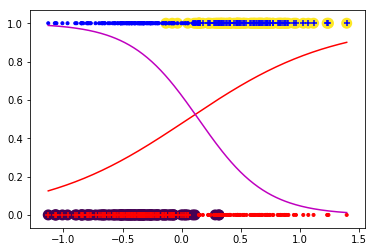

[[ 0.13388675]
 [-0.16574201]
 [-0.14479119]
 [-0.11506695]
 [ 0.13403685]
 [-0.15290916]
 [ 0.95944428]
 [-0.13920955]
 [-0.13618399]
 [-0.12786208]
 [ 0.14449045]
 [-0.13851363]
 [-0.18442761]
 [ 0.12405413]
 [ 0.14420667]
 [-0.149178  ]
 [ 0.15060484]
 [-0.28154352]
 [ 0.11688392]
 [ 0.20557094]
 [-0.14663638]
 [ 0.28848462]
 [ 0.3609561 ]
 [-0.14964594]
 [ 0.1279479 ]
 [-0.12935533]
 [ 0.13927856]
 [-0.13623123]
 [ 0.14416662]
 [-0.12675933]
 [ 0.2007086 ]
 [ 0.92675146]
 [ 0.21381761]
 [ 0.14737169]
 [-0.12882191]
 [ 0.1507217 ]
 [ 0.19448695]
 [-0.12300899]
 [ 0.15506613]
 [-0.13474952]
 [ 0.39116809]
 [ 0.1595704 ]
 [-0.12210467]
 [-0.14369313]
 [ 0.14362343]
 [-0.14830481]
 [ 0.15484911]
 [ 0.17658118]
 [ 0.13123314]
 [ 0.30528978]
 [ 0.14653953]
 [-0.13555567]
 [ 0.23071663]
 [ 0.14044777]
 [ 0.13176432]
 [ 0.15284238]
 [-0.13352057]
 [ 0.13517418]
 [ 0.194426  ]
 [ 0.15619582]
 [-0.12315652]
 [ 0.13718562]
 [-0.24083356]
 [-0.16028101]
 [-0.13287799]
 [ 0.13094635]
 [ 0.14596

In [234]:
out_ = (aout_>0.5).astype(int)
plt.scatter(xx, yy , c=yy, lw=5)
plt.scatter(xx, out_.reshape(-1), c=out_.reshape(-1),
            marker='+', cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(xx, out.reshape(-1), c=out.reshape(-1),
            marker='.', cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(xxx.reshape(-1), sigmoid.forward(xxx@wr + br), c='r')
plt.plot(xxx.reshape(-1), curv, c='m')
plt.show()

print(nn.CrossEntropyBinary.del_loss(a2_, y))

In [282]:
def logit(x, epsilon = 1e-2):
    x = x.clip(min = epsilon, max=1-epsilon)
    return np.log(x / (1-x))

In [283]:
ztarg = logit(y)
ztarg

array([[-4.59511985],
       [ 4.59511985],
       [ 4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [ 4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [-4.59511985],
       [-4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [-4.59511985],
       [ 4.59511985],
       [ 4.59511985],
       [-4.59511985],
       [ 4

In [284]:
br2 = ztarg.mean()
wr2 = x.T.dot(ztarg - br2)/(x**2).sum()
wr2, br2

(array([[6.87424204]]), -0.6433167790188429)

In [285]:
zout2_ = x@wr2 + br2
aout2_ = sigmoid.forward(zout2_)
print(nn.CrossEntropyBinary.loss(aout2_, y),
     nn.CrossEntropyBinary.loss(aout_, y),
     nn.CrossEntropyBinary.loss(a1, y))

0.15039967320711642 0.4044561393917641 0.1305172458400537


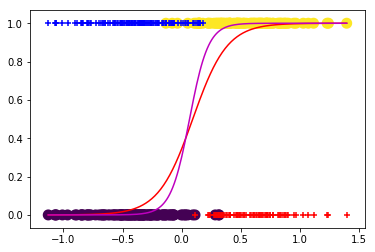

[[ 0.69556523]
 [-0.90647727]
 [-0.82368516]
 [-0.33127357]
 [ 0.69810206]
 [-0.86945909]
 [ 0.98549167]
 [-0.77122098]
 [-0.73177451]
 [-0.57667508]
 [ 0.82140238]
 [-0.76292936]
 [-0.93113971]
 [ 0.49337198]
 [ 0.81919919]
 [-0.85170643]
 [ 0.85904508]
 [-0.96141052]
 [ 0.35821782]
 [ 0.94449841]
 [-0.83659898]
 [ 0.96213597]
 [ 0.96713886]
 [-0.85419573]
 [ 0.57854102]
 [-0.60867948]
 [ 0.77201923]
 [-0.73246073]
 [ 0.81888436]
 [-0.55252961]
 [ 0.94214122]
 [ 0.98226678]
 [ 0.94785917]
 [ 0.84126455]
 [-0.59737335]
 [ 0.85961399]
 [ 0.93859761]
 [-0.47118665]
 [ 0.87785277]
 [-0.70982059]
 [ 0.96844199]
 [ 0.89209857]
 [-0.45252823]
 [-0.81508711]
 [ 0.81451626]
 [-0.84683066]
 [ 0.87706054]
 [ 0.92310588]
 [ 0.64692163]
 [ 0.96365485]
 [ 0.83596508]
 [-0.72242561]
 [ 0.95299056]
 [ 0.78491169]
 [ 0.65720938]
 [ 0.86917969]
 [-0.68927701]
 [ 0.71654657]
 [ 0.93855947]
 [ 0.88180471]
 [-0.4742814 ]
 [ 0.74583253]
 [-0.95529654]
 [-0.89401589]
 [-0.67790461]
 [ 0.64126226]
 [ 0.83210

In [287]:
out2_ = (aout2_>0.5).astype(int)
plt.scatter(xx, yy , c=yy, lw=5)
plt.scatter(xx, out_.reshape(-1), c=out_.reshape(-1),
            marker='+', cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(xxx.reshape(-1), sigmoid.forward(xxx@wr2 + br2), c='r')
plt.plot(xxx.reshape(-1), log1.forward(xxx), c='m')
plt.show()

print(nn.CrossEntropyBinary.del_loss(a2_, y))

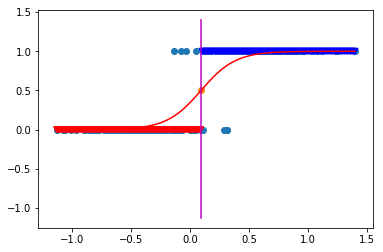

In [335]:
plt.scatter(xx, yy)
zzz = xxx@wr2 + br2
yyy = sigmoid.forward(zzz)

plt.plot(xxx, yyy, color='r')
plt.scatter([-br2/wr2],[0.5])
# plt.scatter([xxx[89]], [(xxx@wr2 + br2)[89]], marker='.')
plt.plot(np.ones_like(xxx)*(-br2/wr2), xxx, color='m')
ccc = (yyy>0.5).astype(int)
plt.scatter(xxx, ccc.reshape(-1), c=ccc.reshape(-1),
            marker='v', cmap=matplotlib.colors.ListedColormap(colors))
# plt.plot(xxx, zzz)

In [308]:
np.argmin(np.abs(xxx))

89

In [309]:
# np.c_[xxx, np.arange(0, len(xxx))]
xxx[89]

array([0.00059172])

In [310]:
(xxx@wr2 + br2)[89]

array([-0.63924917])